In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [2]:
#creating a random distribution of numbers.
#mu=mean,sigma=std,
#num_samples=total no of samples you are taking,
# seed=constant distribution not change evertime(random_state)

def create_numbers(mu=54,sigma=15,num_samples=100,seed=42):
    np.random.seed(seed)

    sample_numbers=np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_numbers=np.round(sample_numbers,decimals=0)

    return sample_numbers



In [3]:
sample=create_numbers()
print(sample)

[61. 52. 64. 77. 50. 50. 78. 66. 47. 62. 47. 47. 58. 25. 28. 46. 39. 59.
 40. 33. 76. 51. 55. 33. 46. 56. 37. 60. 45. 50. 45. 82. 54. 38. 66. 36.
 57. 25. 34. 57. 65. 57. 52. 49. 32. 43. 47. 70. 59. 28. 59. 48. 44. 63.
 69. 68. 41. 49. 59. 69. 47. 51. 37. 36. 66. 74. 53. 69. 59. 44. 59. 77.
 53. 77. 15. 66. 55. 50. 55. 24. 51. 59. 76. 46. 42. 46. 68. 59. 46. 62.
 55. 69. 43. 49. 48. 32. 58. 58. 54. 50.]


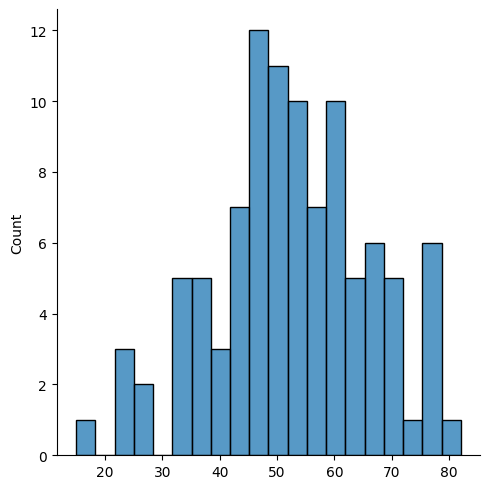

In [4]:
sns.displot(sample,bins=20)

<AxesSubplot:>

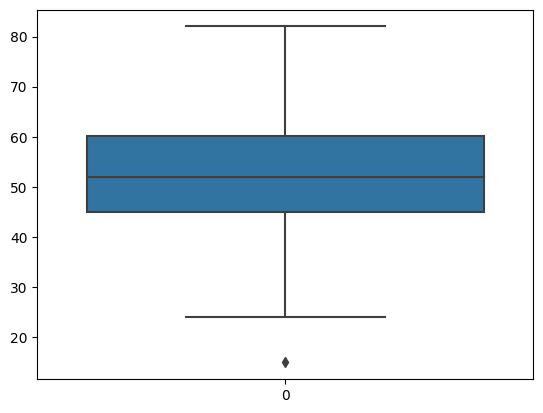

In [5]:
sns.boxplot(sample)

In [6]:
ser=pd.Series(sample)
ser

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 100, dtype: float64

In [7]:
ser.describe()

count    100.000000
mean      52.410000
std       13.610079
min       15.000000
25%       45.000000
50%       52.000000
75%       60.250000
max       82.000000
dtype: float64

In [8]:
IQR=60.25-45
upper_limit=60.25+1.5*(IQR)
lower_limit=45-1.5*(IQR)
print(upper_limit)
print(lower_limit)

83.125
22.125


In [9]:
ser[ser>lower_limit]  
#Remove the outlier

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 99, dtype: float64

In [10]:
q75,q25=np.percentile(sample,[75,25])
IQR=q75-q25
IQR

15.25

In [11]:
with open(r'C:\Users\localadmin\OneDrive\Desktop\MLex\Modular\ML_base\data\Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [13]:
df=pd.read_csv(r"C:\Users\localadmin\OneDrive\Desktop\MLex\Modular\ML_base\data\Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

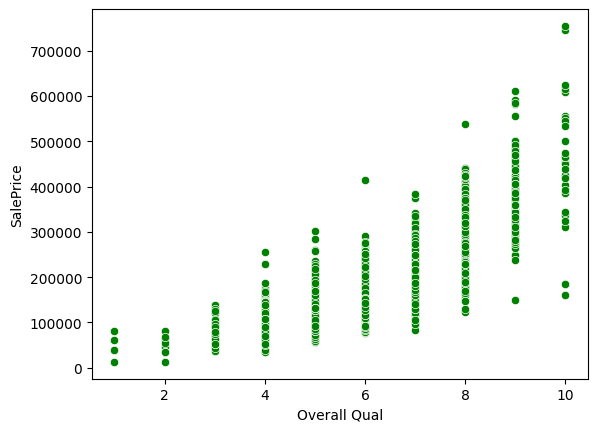

In [17]:
sns.scatterplot(x="Overall Qual",y="SalePrice",data=df,color="green")

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

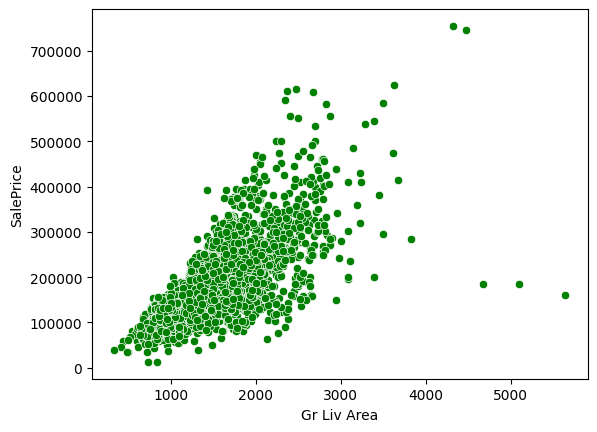

In [18]:
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df,color="green")

In [27]:
df[(df["Overall Qual"]>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [28]:
df[(df["Gr Liv Area"]>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [34]:
drop_ind=df[(df["Overall Qual"]>8) & (df['SalePrice']<200000)]

In [35]:
df=df.drop(drop_ind,axis=0)

KeyError: "['PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area' 'Street'\n 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config' 'Land Slope'\n 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type' 'House Style'\n 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add' 'Roof Style'\n 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type' 'Mas Vnr Area'\n 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual' 'Bsmt Cond'\n 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1' 'BsmtFin Type 2'\n 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating' 'Heating QC'\n 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF' 'Low Qual Fin SF'\n 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath' 'Full Bath' 'Half Bath'\n 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual' 'TotRms AbvGrd'\n 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type' 'Garage Yr Blt'\n 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual' 'Garage Cond'\n 'Paved Drive' 'Wood Deck SF' 'Open Porch SF' 'Enclosed Porch'\n '3Ssn Porch' 'Screen Porch' 'Pool Area' 'Pool QC' 'Fence' 'Misc Feature'\n 'Misc Val' 'Mo Sold' 'Yr Sold' 'Sale Type' 'Sale Condition' 'SalePrice'] not found in axis"

In [ ]:
#df.to_csv("Folder location")

In [36]:
df=pd.read_csv(r"C:\Users\localadmin\OneDrive\Desktop\MLex\Modular\ML_base\data\Ames_outliers_removed.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [40]:
#df=df.drop("PID",axis=1)
df.shape

(2927, 80)

In [42]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [45]:
((df.isnull().sum())/len(df))*100

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [46]:
def percent_missing(df):
    percent_nan=((df.isnull().sum())/len(df))*100
    percent_nan=percent_nan[percent_nan>0].sort_values() #percentage missing more than 0%

    return percent_nan

In [47]:
percent_nan=percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

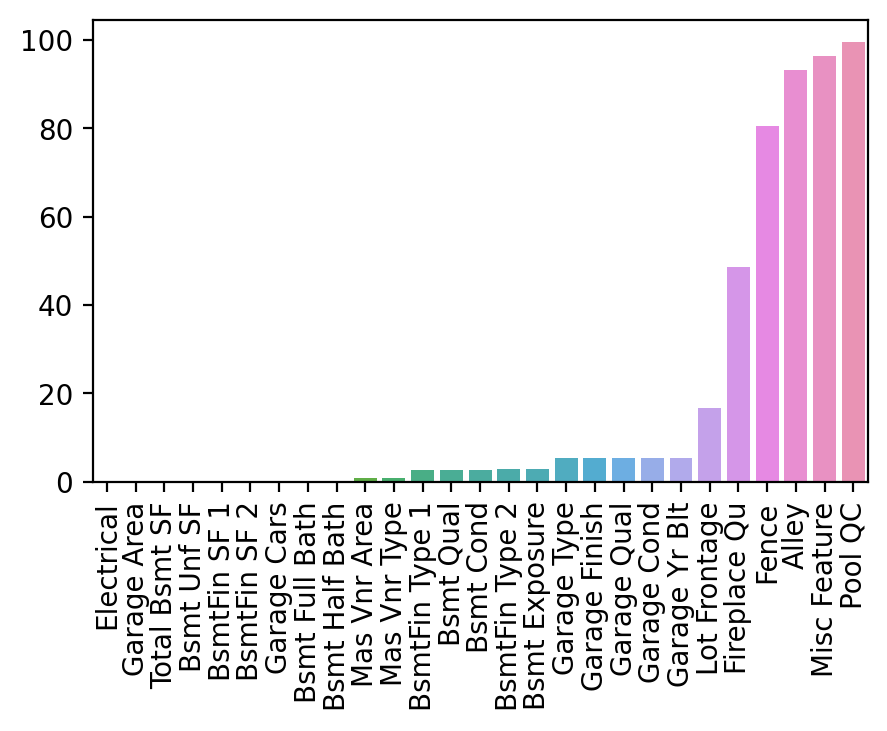

In [49]:
plt.figure(figsize=(5,3),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)   #just to view x indices correctly with out enclosing

(0.0, 1.0)

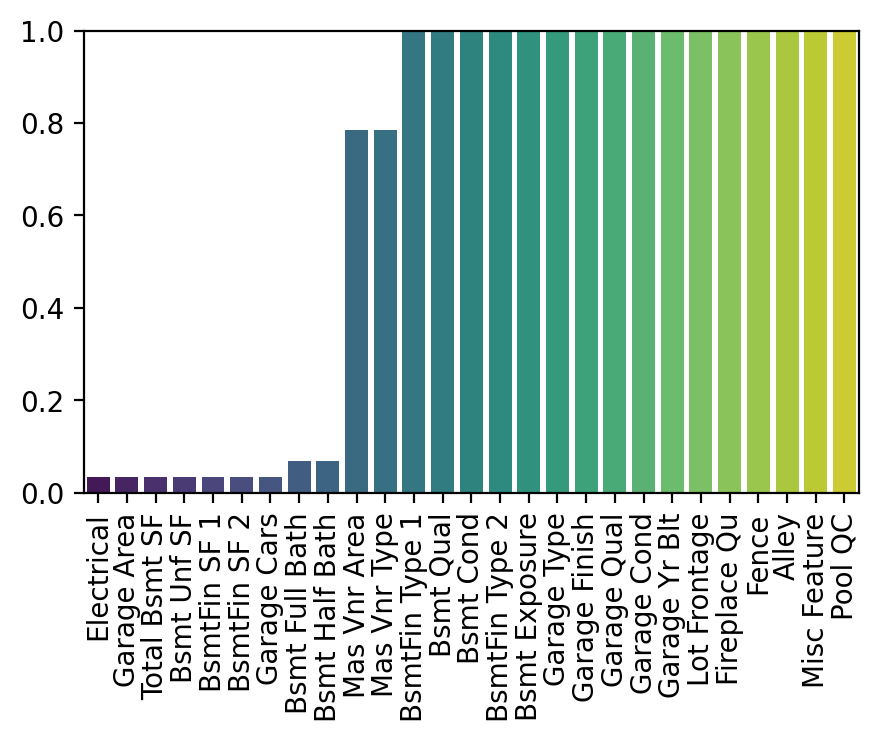

In [51]:
plt.figure(figsize=(5,3),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan,palette="viridis")   #palette is for colors
plt.xticks(rotation=90)   #just to view x indices correctly with out enclosing
plt.ylim(0,1)  #for visuvalizing 1% data limit y axis to 1%

In [52]:
percent_nan[percent_nan>1] #dropped 1% of data

BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

In [54]:
df=df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [55]:
percent_nan=percent_missing(df)
percent_nan

Bsmt Unf SF        0.034188
Total Bsmt SF      0.034188
BsmtFin SF 2       0.034188
BsmtFin SF 1       0.034188
Bsmt Full Bath     0.068376
Bsmt Half Bath     0.068376
Mas Vnr Type       0.786325
Mas Vnr Area       0.786325
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
BsmtFin Type 2     2.769231
Bsmt Exposure      2.837607
Garage Type        5.367521
Garage Qual        5.401709
Garage Cond        5.401709
Garage Finish      5.401709
Garage Yr Blt      5.401709
Lot Frontage      16.752137
Fireplace Qu      48.547009
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
dtype: float64

(0.0, 1.0)

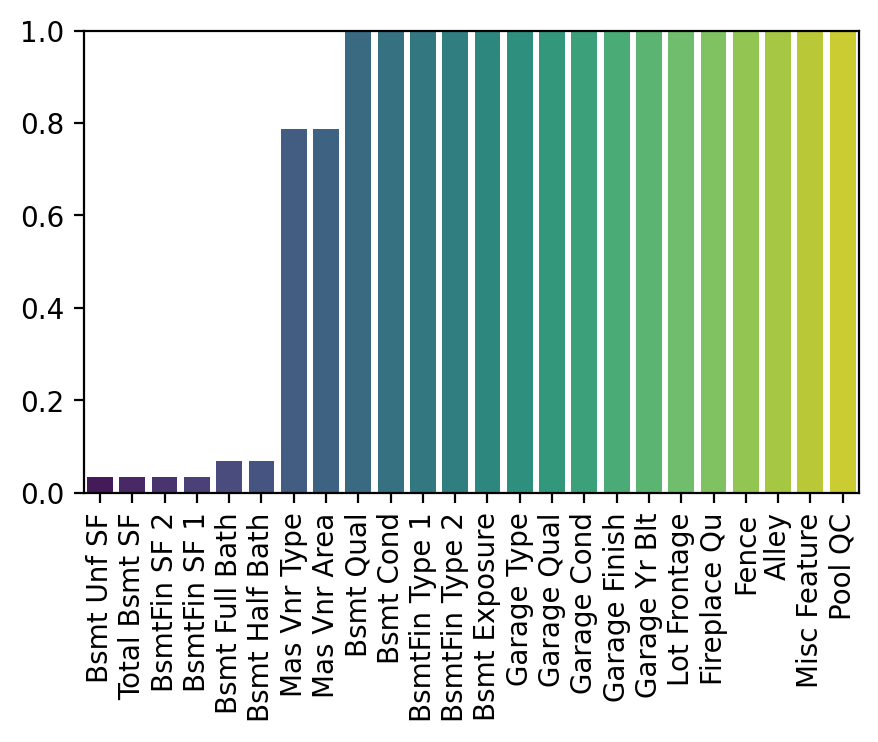

In [56]:
plt.figure(figsize=(5,3),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan,palette="viridis")   #palette is for colors
plt.xticks(rotation=90)   #just to view x indices correctly with out enclosing
plt.ylim(0,1)  #for visuvalizing 1% data limit y axis to 1%